In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas import Series


In [2]:
data = pd.read_csv('AEP_hourly.csv')
data.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
# sns.pairplot(data)

In [4]:
# X = data.iloc[:,:-1].values
# y = data.iloc[:,11].values

In [5]:
# plt.scatter(data.iloc[0:50,0],data.iloc[0:50,1])

In [6]:
# type(pd.to_datetime(data['Datetime'][0]))

In [7]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()

In [8]:
# regressor.fit(pd.to_datetime(data['Datetime']) , data['AEP_MW'])

In [9]:
import time
# s = "16-08-2013 09:51:43"
# d = datetime.strptime(s, "%d-%m-%Y %H:%M:%S")
# time.mktime(d.timetuple())
for i in range(0,data.iloc[0:10,0].shape[0]):
    s = data["Datetime"][i]
    d = datetime.strptime(s, "%Y-%m-%d %H:%M:%S")
    data['Datetime'][i] = time.mktime(d.timetuple())
    

/home/vishal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
X = data.iloc[0:10,:-1].values
y = data.iloc[0:10,1].values

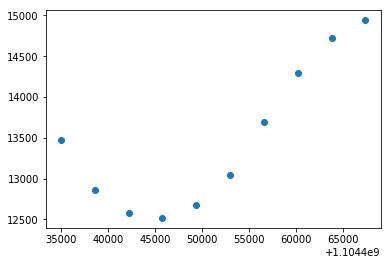

In [11]:
plt.scatter(data.iloc[0:10,0],data.iloc[0:10,1])

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size= 0.2 ,random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

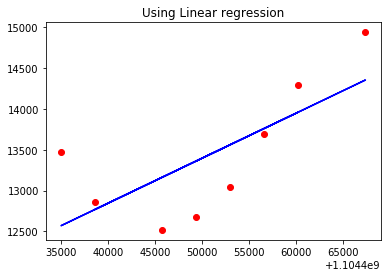

In [14]:
plt.scatter(X_train,y_train , color = 'red')
plt.plot(X_train,regressor.predict(X_train) , color = 'blue')
plt.title("Using Linear regression")
plt.show()

In [19]:
from sklearn.preprocessing import  PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
regressor2 = LinearRegression()
regressor2.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

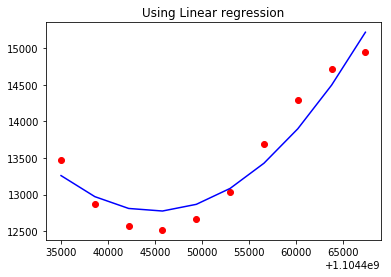

In [20]:
plt.scatter(X,y , color = 'red')
plt.plot(X,regressor2.predict(poly_reg.fit_transform(X)) , color = 'blue')
plt.title("Using Linear regression")
plt.show()

In [17]:
regressor.score(X_test,y_test)

0.7964562633245338

In [18]:
regressor2.score(poly_reg.fit_transform(X_test),y_test)

0.9435154145245013